### Problem 1 Ex. 6.5

**Show that fitting a locally constant multinomial logit model of the form (6.19) amounts to smoothing the binary response indicators for each class separately using a Nadaraya-Watson kernel smoother with kernel weights $K_{\lambda}(x_0,x_i)$.**


When fitting a locally constant multinomial logit model using kernel smoothing, we smooth the binary response indicators for each class separately with Nadaraya-Watson kernel weights $K_{\lambda}(x_0,x_i)$, as stated in equation (6.2) in the text. For any class $j$, we define $y_i$ as $1$ if $i$ belongs to the set of indices $G_j$ that correspond to class $j$. By applying Bayes' rule, we can compute the probability of $x_0$ belonging to class $j$:

\begin{equation}
\text{P}(G=j|X=x_0) = \frac{\sum_{i\in G_j} K_\lambda(x_0, x_i)}{\sum_{i=1}^N K_\lambda(x_0, x_i)}\propto \sum_{i\in G_j} K_\lambda(x_0, x_i).
\end{equation}

Thus, we classify $x_0$ to the class that maximizes $\sum_{i\in G_j} K_\lambda(x_0, x_i)$. On the other hand, the local multinomial logit model (6.19) in the text has a form that allows us to estimate the probability of $x_0$ belonging to each class $j$:

\begin{equation}
\hat{\text{Pr}}(G=j|X=x_0) = \frac{e^{\hat\beta_{j0}(x_0)}}{1+\sum_{k=1}^{K-1}e^{\hat\beta_{k0}(x_0)}}.
\end{equation}

To classify $x_0$ to the class with the highest probability, we choose the class that maximizes $\hat\beta_{j0}$ for each class $j$. In order to show that $\hat\beta_{j0}$ is a non-decreasing function of $\sum_{i\in G_j} K_\lambda(x_0, x_i)$, we take the derivative of the log-likelihood $l(\beta, x_0)$ with respect to $\beta_{j0}$ and set it to zero.

Let $\beta$ denote the parameter set ${\beta_{k0}, \beta_k, k=1,...,K-1}$. We code the class from $1$ to $K$ so that the log-likelihood $l(\beta, x_0)$ can be written as:

$$
l(\beta, x_0) = \sum_{i=1}^{N}K_{\lambda}(x_0, x_i) \left( \sum_{k=1}^{K-1}1(y_i = k) \left[\beta_{k0}(x_0) + \beta_k(x_0)^T(x_i - x_0) \right] - log(1 + \sum_{l=1}^{K-1}e^{\beta_{l0}(x_0)+ \beta_l^T(x_0)(x_i-x_0)})\right)
$$


In order to maximize the log-likelihood, we need to set its derivatives to zero and then solve the equations to find $\hat\beta_{k0}$. These equations, for $j=1,...,K-1$, are:

$$
\frac{\partial l (\beta, x_0)}{\partial \beta_{j0}} = \sum_{i=1}{N}K_{\lambda}(x_0, x_i)\left(1(y_i = j) - \frac{e^{\beta_{j0}+ \beta_j^T(x_i-x_0)}}{1 + \sum_{l=1}^{K-1}e^{\beta_{l0}+ \beta_l^T(x_i-x_0)}}\right)
$$

$$
= \sum_{i \in G_j}K_\lambda (x_0, x_i) - e^{\beta_{j0}} * \sum_{i=1}^{N}K_{\lambda}(x_0, x_i)\frac{e^{\beta_j^T(x_i-x_0)}}{1 + \sum_{l=1}^{K-1}e^{\beta_{l0}+ \beta_l^T(x_i-x_0)}}
$$


Solving this equation, we find that:

\begin{equation}
\exp(\hat\beta_{j0}) \propto \sum_{i\in G_j} K_\lambda(x_0, x_i).
\end{equation}

Hence, we see that fitting a locally constant multinomial logit model is equivalent to smoothing the binary response indicators for each class separately using a Nadaraya-Watson kernel smoother with kernel weights $K_{\lambda}(x_0,x_i)$. This allows us to estimate the probability of $x_0$ belonging to each class and classify it to the class with the highest probability.

Finally, as a conclusion, we have shown that the locally constant multinomial logit model and the Nadaraya-Watson kernel smoother are consistent classification methods. By smoothing the binary response indicators for each class separately using kernel weights $K_{\lambda}(x_0,x_i)$, we are able to estimate the probability of $x_0$ belonging to each class and classify it to the class with the highest probability. We have shown that $\hat{\beta}{j0}$ is a non-decreasing function of $\sum{i\in G_j} K_\lambda(x_0, x_i)$, which means that both classification methods classify $x_0$ to class $j$ that maximizes the smoothed count of class $j$. This is an intuitive way to classify new observations based on their neighbors. Therefore, the locally constant multinomial logit model is also an effective method for classification, especially when the underlying relationship between the predictors and response is non-linear and local.

### Problem 2 Ex. 6.7

**Derive an expression for the leave-one-out cross-validated residual sum-of-squares for local polynomial regression.**

We will derive an expression for the leave-one-out cross-validated residual sum-of-squares (LOOCV_RSS) for local polynomial regression, a non-parametric regression technique. We will first introduce the concept of local polynomial regression and leave-one-out cross-validation, followed by a step-by-step derivation of the LOOCV_RSS expression, and finally, provide a conclusion summarizing our findings.

Local polynomial regression, also known as kernel regression or the Nadaraya-Watson estimator, is a non-parametric method that fits a polynomial of a certain degree to the data within a local neighborhood of each point. It provides a smooth estimate of the underlying function by leveraging a kernel function, which assigns weights to the observations in the neighborhood.

Let's consider a dataset of $n$ observations, ${(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)}$. We want to fit a local polynomial regression model to predict the response variable $y_i$ given the explanatory variable $x_i$. The key idea is to fit a polynomial of degree $p$ in the vicinity of a point $x_0$, by minimizing the following weighted least squares objective function:

$$
Q(\mathbf{b}) = \sum_{i=1}^n \left[ K_h(x_i - x_0) \cdot \left(y_i - b_0 - b_1(x_i - x_0) - \dots - b_p(x_i - x_0)^p\right)^2 \right]
$$,

In a more simplified mathematical expression:  

$$
\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1 (x_i - x) + \dots + \hat{\beta}_d (x_i - x)^d
$$

where $i = 1, 2, \dots, n$, and $K_h$ is the kernel function with bandwidth $h$. The kernel function assigns weights to the observations in the neighborhood of $x_0$.

Leave-one-out cross-validation (LOOCV) is a model validation technique used to assess the performance of a predictive model. In LOOCV, we fit the model n times and calculate for n-1 data points, as one out of all of them must be left out, where n is the number of observations in the dataset. Each time, we leave out one observation and calculate the prediction error for the left-out observation. 

The polynomial regression with the n-1 data points observations:

$$
\hat{y_{i}}^{(-i)} = \hat{\beta}_{0}^{(-i)} + \hat{\beta}_{1}^{(-i)}(x_{i} - x) + \cdots + \hat{\beta}_{d}^{(-i)}(x{i} - x)^{d}
$$

The LOOCV_RSS is the sum of the squared prediction errors for all observations.

Now let's derive the expression for the LOOCV_RSS for local polynomial regression. We start by expressing the relationship between the estimated response values and the observed response values using a linear estimator:

\begin{equation}
\hat{\mathbf{f}} = \mathbf{S}_\lambda \mathbf{y},
\end{equation}

where $\hat{\mathbf{f}}$ is the vector of fitted values, $\mathbf{y}$ is the vector of observed response values, and $\mathbf{S}_\lambda$ is the smoother matrix with ${\mathbf{S}\lambda}{ij} = l_i(x_j)$ for $l_i(x)$ defined by (6.8) in the text.

Substituting this expression into the definition of LOOCV and simplifying, we get:

$$
LOOCV = \frac{1}{n}\sum_{i=1}^{n} \left(\frac{y_{i} - \hat{\beta}{0(-i)} - \hat{\beta}{1(-i)}(x_{i} - x) - \dots - \hat{\beta}{d(-i)}(x{i} - x)^{d}}{\left(1- H_{ii} \right)}\right)^{2}
$$

where $\mathbf{H}$ is the hat matrix.

In order to simplify this expression further, we can use the Sherman-Morrison-Woodbury formula and some matrix algebra to derive the influence matrix $\mathbf{H}$, such that:

\begin{equation}
\mathbf{H} = \mathbf{W} \cdot (\mathbf{W}^T \cdot \mathbf{W})^{-1} \cdot \mathbf{W}^T.
\end{equation}

By leveraging the properties of the influence matrix $\mathbf{H}$, we can rewrite the LOOCV\_RSS expression as:

\begin{equation}
LOOCV\_RSS = \sum_{i=1}^n \frac{(y_i - \hat{y}_i)^2}{(1 - h_{ii})^2},
\end{equation}

where $\hat{y}_i = (\mathbf{W} \cdot \mathbf{y})_i$ and $h_{ii}$ is the $i$th diagonal element of the influence matrix $\mathbf{H}$. The diagonal element $\mathbf{H}_{ii}$ of the hat matrix measures the influence of the $i$-th observation on its own predicted value.

In summary, the leave-one-out cross-validated residual sum-of-squares for local polynomial regression is given by:

\begin{equation}
LOOCV\_RSS = \sum_{i=1}^n \frac{(y_i - \hat{y}_i)^2}{(1 - h_{ii})^2}, \quad i = 1, 2, \dots, n.
\end{equation}


We can express the difference between the observed response value $y_i$ and the predicted response value $\hat f^{-i}(x_i)$ when the ith observation is left out:

\begin{equation}
y_i - \hat f^{-i}(x_i) = \frac{y_i - \hat f(x_i)}{1-{\mathbf{S}\lambda}{ii}}.
\end{equation}

To obtain the LOOCV_RSS, we square the above equation and sum over all observations:

\begin{equation}
LOOCV_RSS = \sum_{i=1}^n (y_i - \hat f^{-i}(x_i))^2 = \sum_{i=1}^n \left(\frac{y_i - \hat f(x_i)}{1-{\mathbf{S}\lambda}{ii}}\right)^2.
\end{equation}

This expression shows the relationship between the LOOCV_RSS and the elements of the smoother matrix, $\mathbf{S}_\lambda$. The smoother matrix plays a crucial role in the performance of the local polynomial regression, as it determines the influence of each observation on the predictions. The diagonal elements ${\mathbf{S}\lambda}{ii}$ represent the leverage of the $i$ th observation, and smaller values indicate that the observation has less influence on its own prediction.

In conclusion, we have derived the expression for the leave-one-out cross-validated residual sum-of-squares for local polynomial regression:

\begin{equation}
LOOCV_RSS = \sum_{i=1}^n \left(\frac{y_i - \hat f(x_i)}{1-{\mathbf{S}\lambda}{ii}}\right)^2.
\end{equation}

This derived expression can be used to assess the performance of a local polynomial regression model by comparing the LOOCV_RSS across different model configurations, such as varying the degree of the polynomial or the bandwidth of the kernel function.


In the previous development, some steps have been skiped, but this will be a more precise walk through the maths behind. 

We can rephrase the leave-one-out cross-validated residual sum-of-squares as:

$$
Cross Validation = \frac{1}{n} \sum_{i=1}^{n} [r^{-i}(x_{i})]^2
$$

Taking into account the expression:

$$
r^{\text{-}i}(x_i)=y_i-\hat{f}^{\text{-}i}(x_i)
$$

We then obtain:

$$
Cross Validation = \frac{1}{n} \sum_{i=1}^{n} [y_i - \hat{f}^{-i}(x_i)]^2 = \frac{1}{n} \left[ y_i - \sum_{j\neq i} w_{ij}^{(d)}(x_i)y_j \right]^2
$$

After using some properties of squared terms and perform some operations, we reach the next expression:

$$
Cross Validation = \frac{1}{n} \sum_{i=1}^{n}\left(\frac{y_i - \hat{f}^{(-i)}(x_i)}{1- K_h(x_i)}\right)^2
$$

The RSS formula should not b divided over the $n$ factor, but the expression would be almost the same as above.

This last generic formula highlights the mean squared discrepancy between the actual response values, $y_i$, and their respective predictions, $\hat{f}^{(-i)}(x_i)$, adjusted by the leave-one-out weighting component. Utilizing the leave-one-out technique strikes a balance between the bias-variance terms in the trade-off that defines the over or underfitting. Additionally offers a fair assessment of the model's capacity to predict on unseen data. 


### Problem 3 Ex. 7.4

**Consider the in-sample prediction error (7.18) and the training error in the case of squared-error loss:

\begin{equation}
    \text{Err}_{\text{in}} = \frac{1}{N}\sum_{i=1}^N E_{Y^0}(Y_i^0-\hat f(x_i))^2 \\
    \overline{\text{err}} = \frac{1}{N}\sum_{i=1}^N(y_i-\hat f(x_i))^2.
\end{equation}

Add and subtract $f(x_i)$ and $E\hat f(x_i)$ in each expression and expand. Hence establish that the average optimism in the training error is:

\begin{equation}
    \frac{2}{N}\sum_{i=1}^N\text{Cov}(\hat y_i, y_i),
\end{equation}

as given in (7.21)**


In this problem, we are given $\text{Err}{\text{in}}$ and $\overline{\text{err}}$, and our goal is to establish that the average optimism in the training error is $2\text{Cov}(y_i, \hat y_i)$. We will start by expanding the terms for both $\text{Err}{\text{in}}$ and $\overline{\text{err}}$ and then compute their difference.

First, we rewrite the terms by introducing $\hat y_i = \hat f(x_i)$:

\begin{equation}
Y_i^0-\hat f(x_i) = Y_i^0-f(x_i) + f(x_i)-E\hat y_i + E\hat y_i -\hat y_i
\end{equation}

After expanding the squared terms and computing the expectation for both $\text{Err}{\text{in}}$ and $\overline{\text{err}}$, we obtain the expressions with six terms each, labeled $A_i, B_i, \dots, F_i$ for $\text{Err}{\text{in}}$ and $G_i, B_i, \dots, J_i$ for $\overline{\text{err}}$.


\begin{equation}
    \text{Err}{\text{in}}=\frac{1}{N}\sum_{i=1}^NE_{Y^0}\left(Y_i^0-f(x_i) + f(x_i)-E\hat y_i + E\hat y_i -\hat y_i\right)^2 = 
    \frac{1}{N}\sum_{i=1}^NA_i + B_i + C_i + D_i + E_i + F_i,
\end{equation}

where

$$
A_i = E_{Y^0} (Y_i^0-f(x_i))^2
$$

$$
B_i = E_{Y^0} (f(x_i) - E\hat y_i)^2 = (f(x_i) - E\hat y_i)^2
$$

$$
C_i = E_{Y^0} (E\hat y_i-\hat y_i)^2 = (E\hat y_i-\hat y_i)^2
$$

$$
D_i = 2E_{Y^0} (Y_i^0-f(x_i))(f(x_i) - E\hat y_i)
$$

$$
E_i = 2E_{Y^0} (Y_i^0-f(x_i))(E\hat y_i-\hat y_i)
$$

$$
F_i = 2E_{Y^0} (f(x_i) - E\hat y_i)(E\hat y_i-\hat y_i) = 2(f(x_i) - E\hat y_i)(E\hat y_i-\hat y_i)
$$

and from: 

\begin{equation}
Y_i^0-\hat f(x_i) = Y_i^0-f(x_i) + f(x_i)-E\hat y_i + E\hat y_i -\hat y_i
\end{equation}

we derive: 

\begin{equation}
y_i-\hat f(x_i) = y_i - f(x_i) +f(x_i) - E\hat y_i + E\hat y_i -\hat y_i
\end{equation}


So for $\overline{\text{err}}$ we obtain

\begin{equation}
\overline{\text{err}}=\frac{1}{N}\sum_{i=1}^{N}(y_i - f(x_i) +f(x_i) - E\hat y_i + E\hat y_i -\hat y_i)^2
\frac{1}{N}\sum_{i=1}^N = G_i + B_i + C_i + H_i + J_i + F_i,
\end{equation}

being

$$
G_i = (y_i-f(x_i))^2\
$$

$$
H_i = 2(y_i-f(x_i))(f(x_i) - E\hat y_i)\
$$

$$
J_i = 2(y_i-f(x_i))(E\hat y_i -\hat y_i)
$$

Now, we compute the difference between these two expressions:

$$
E_{\mathbb{y}}(\text{op}) = E_{\mathbb{y}}(\text{Err}_{\text{in}} - \overline{\text{err}}) = \frac{1}{N}\sum_{i=1}^N E_{\mathbb{y}}[(A_i - G_i) + (D_i - H_i) + (E_i - J_i)].
$$


Upon further investigation, we find that the differences in the squared terms $E_\mathbb{y}(A_i - G_i)$ vanish, as they capture the unpredictable error. Moreover, the cross terms $E_\mathbb{y}(D_i)$, $E_\mathbb{y}(H_i)$, and $E_\mathbb{y}(E_i)$ are also equal to zero.


\begin{equation}
E_\mathbb{y}(\text{op}) = - \frac{2}{N}\sum_{i=1}^NJ_i\
= - \frac{2}{N}\sum_{i=1}^NE_\mathbb{y}(y_i-f(x_i))(E\hat y_i -\hat y_i)\
=\frac{2}{N}\sum_{i=1}^N [E_\mathbb{y}(y_i\hat y_i) - E_\mathbb{y}(y_i)E_\mathbb{y}(\hat y_i)]\
=2\text{Cov}(y_i, \hat y_i).
\end{equation}


As a result, we can simplify the expression for the average optimism as:

\begin{equation}
E_\mathbb{y}(\text{op}) = - \frac{2}{N}\sum_{i=1}^NJ_i = 2\text{Cov}(y_i, \hat y_i).
\end{equation}

In conclusion, we have shown that the average optimism in the training error, as given in the original problem, can be expressed as $2\text{Cov}(y_i, \hat y_i)$. The process involved expanding the squared terms for both $\text{Err}_{\text{in}}$ and $\overline{\text{err}}$, computing their difference, and simplifying the resulting expression.

### Problem 4 Ex. 7.5

**For a linear smoother, 
\begin{equation}
\hat{\mathbf{y}} = \mathbf{S} \mathbf{y}
\end{equation} 
show that

\begin{equation}
\sum_{i=1}^N\text{Cov}(\hat y_i, y_i) = \text{trace}(\mathbf{S})\sigma_\epsilon^2,\nonumber
\end{equation}

which justifies its use as the effective number of parameters.**

In this problem, we are asked to show that for a linear smoother, the sum of the covariances between the predicted values $\hat y_i$ and the true values $y_i$ is equal to the trace of the smoother matrix $\mathbf{S}$ multiplied by the error variance $\sigma_\epsilon^2$. This relationship justifies the use of the trace of the smoother matrix as the effective number of parameters.

To demonstrate this, we will perform the following steps:

**Express the sum of the covariances in terms of the covariance matrix:**

\begin{equation}
\sum_{i=1}^N\text{Cov}(\hat y_i, y_i) = \text{trace}(\text{Cov}(\hat{\mathbf{y}}, \mathbf{y}))
\end{equation}

**Replace $\hat{\mathbf{y}}$ with the linear smoother $\mathbf{S} \mathbf{y}$:**

\begin{equation}
\text{trace}(\text{Cov}(\hat{\mathbf{y}}, \mathbf{y})) = \text{trace}(\text{Cov}(\mathbf{S} \mathbf{y}, \mathbf{y}))
\end{equation}

**Apply the properties of the covariance matrix to simplify the expression:**

\begin{equation}
\text{trace}(\text{Cov}(\mathbf{S} \mathbf{y}, \mathbf{y})) = \text{trace}(\mathbf{S} \text{Cov}(\mathbf{y}, \mathbf{y}))
\end{equation}

**Replace the covariance matrix with the variance matrix, as we are working with the same variable:**

\begin{equation}
\text{trace}(\mathbf{S} \text{Cov}(\mathbf{y}, \mathbf{y})) = \text{trace}(\mathbf{S} \text{Var}(\mathbf{y}))
\end{equation}

**Since the variance is given by $\sigma_\epsilon^2$, we can substitute and obtain the final result:**

\begin{equation}
\text{trace}(\mathbf{S} \text{Var}(\mathbf{y})) = \text{trace}(\mathbf{S})\sigma_\epsilon^2
\end{equation}

In conclusion, we have shown that for a linear smoother, the sum of the covariances between the predicted values $\hat y_i$ and the true values $y_i$ is equal to the trace of the smoother matrix $\mathbf{S}$ multiplied by the error variance $\sigma_\epsilon^2$. This relationship supports the use of the trace of the smoother matrix as an effective measure of the number of parameters.




### Problem 5

**Write a computer program to reproduce Figure 7.3. Use information from Section 7.3.1 to generate the simulated data.**

I COULD USE HYPERCUBE SAMPLING FOR DATA GENERATION AND SCIPY, BUT AS ACCORDED WITH THE TA... RANDOM SAMPLING IS ENOUGH FOR GETTING THE GRAPHS' TRENDS

K NEAREST NEIGHBORS MODEL - FOR CLASSIFICATION  
BEST SUBSET SELECTION MODEL - FOR CLASSIFICATION  

from this cell, I will only use the classification models because they need less computing time than the more accurate ones that I have developed in last cells  
in the next cell you will find both models for the REGRESSION PROBLEM


In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, zero_one_loss
from sklearn.feature_selection import SelectKBest, f_regression

# Training set
size_training = 80
size_predictor = 20
train_x = np.random.rand(size_training, size_predictor)

train_y1 = np.where(train_x[:,0] <= .5, 0, 1)
train_y2 = np.where(train_x[:,:10].sum(axis=1) > 5, 1, 0)

X_train, X_test, y_train_reg, y_test_reg = train_test_split(train_x, train_y2, test_size=0.5, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(train_x, train_y1, test_size=0.5, random_state=42)

# Define the range of k-values and p-values
k_values = np.arange(1, 21)
p_values = np.arange(1, 21)

# Preallocate arrays for storing the results
epe_knn_reg = np.zeros(len(k_values))
epe_knn_clf = np.zeros(len(k_values))
epe_best_subset_reg = np.zeros(len(p_values))
epe_best_subset_clf = np.zeros(len(p_values))

# Preallocate arrays for storing bias and variance
bias_knn_reg = np.zeros(len(k_values))
var_knn_reg = np.zeros(len(k_values))
bias_knn_clf = np.zeros(len(k_values))
var_knn_clf = np.zeros(len(k_values))
bias_best_subset_reg = np.zeros(len(p_values))
var_best_subset_reg = np.zeros(len(p_values))
bias_best_subset_clf = np.zeros(len(p_values))
var_best_subset_clf = np.zeros(len(p_values))





# K NEAREST NEIGHBORS MODEL - FOR CLASSIFICATION
# BEST SUBSET SELECTION MODEL - FOR CLASSIFICATION

# from this cell, I will only use the classification models because they need less computing time than the more accurate ones that I have developed in last cells
# in the next cell you will find both models for the REGRESSION PROBLEM




# K-nearest neighbors
for index, k in enumerate(k_values):
    # Regression
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train_reg)
    y_pred_reg = knn_reg.predict(X_test)
    epe_knn_reg[index] = mean_squared_error(y_test_reg, y_pred_reg)
    # Calculate bias and variance
    scores = cross_val_score(knn_reg, X_train, y_train_reg, cv=5, scoring='neg_mean_squared_error')
    bias_knn_reg[index] = -scores.mean()
    var_knn_reg[index] = scores.var()

    # Classification
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train_clf)
    y_pred_clf = knn_clf.predict(X_test)
    epe_knn_clf[index] = zero_one_loss(y_test_clf, y_pred_clf)
    # Calculate bias and variance
    scores = cross_val_score(knn_clf, X_train, y_train_clf, cv=5, scoring='accuracy')
    bias_knn_clf[index] = 1 - scores.mean()
    var_knn_clf[index] = scores.var()

# Best subset regression
for p in p_values:
    # Feature selection
    selector = SelectKBest(f_regression, k=p)
    X_train_selected = selector.fit_transform(X_train, y_train_reg)
    X_test_selected = selector.transform(X_test)

    # Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_selected, y_train_reg)
    y_pred_reg = lin_reg.predict(X_test_selected)
    epe_best_subset_reg[p - 1] = mean_squared_error(y_test_reg, y_pred_reg)
    # Calculate bias and variance
    scores = cross_val_score(lin_reg, X_train_selected, y_train_reg, cv=5, scoring='neg_mean_squared_error')
    bias_best_subset_reg[p - 1] = -scores.mean()
    var_best_subset_reg[p - 1] = scores.var()

    # Classification
    y_pred_clf = (y_pred_reg > 0.5).astype(int)
    epe_best_subset_clf[p - 1] = zero_one_loss(y_test_clf, y_pred_clf)
    # Calculate bias and variance
    scores = cross_val_score(lin_reg, X_train_selected, y_train_clf, cv=5, scoring='accuracy')
    bias_best_subset_clf[p - 1] = 1 - scores.mean()
    var_best_subset_clf[p - 1] = scores.var()


C:\Users\ferro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ferro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ferro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

0 0.25225600000000004 0.250656 0.0015999999999999999 4.597017211338539e-17
1 0.2459234312656 0.2014734345512997 0.04444999671430035 -4.163336342344337e-17
2 0.22907249376869396 0.17630368369563423 0.05276881007305974 -1.3877787807814457e-17
5 0.18790214094534932 0.11413840348692426 0.07376373745842504 1.3877787807814457e-17
7 0.15325801392432817 0.10281663489723246 0.05044137902709565 6.245004513516506e-17
11 0.11648394670326992 0.09120860262570991 0.025275344077560005 0.0
14 0.1197550032560514 0.09349994633293336 0.026255056923118046 -6.938893903907228e-18
17 0.12294100834472092 0.09232704395363828 0.030613964391082663 -1.734723475976807e-17
20 0.11983272765452017 0.09212932464987615 0.027703403004644026 -3.469446951953614e-18


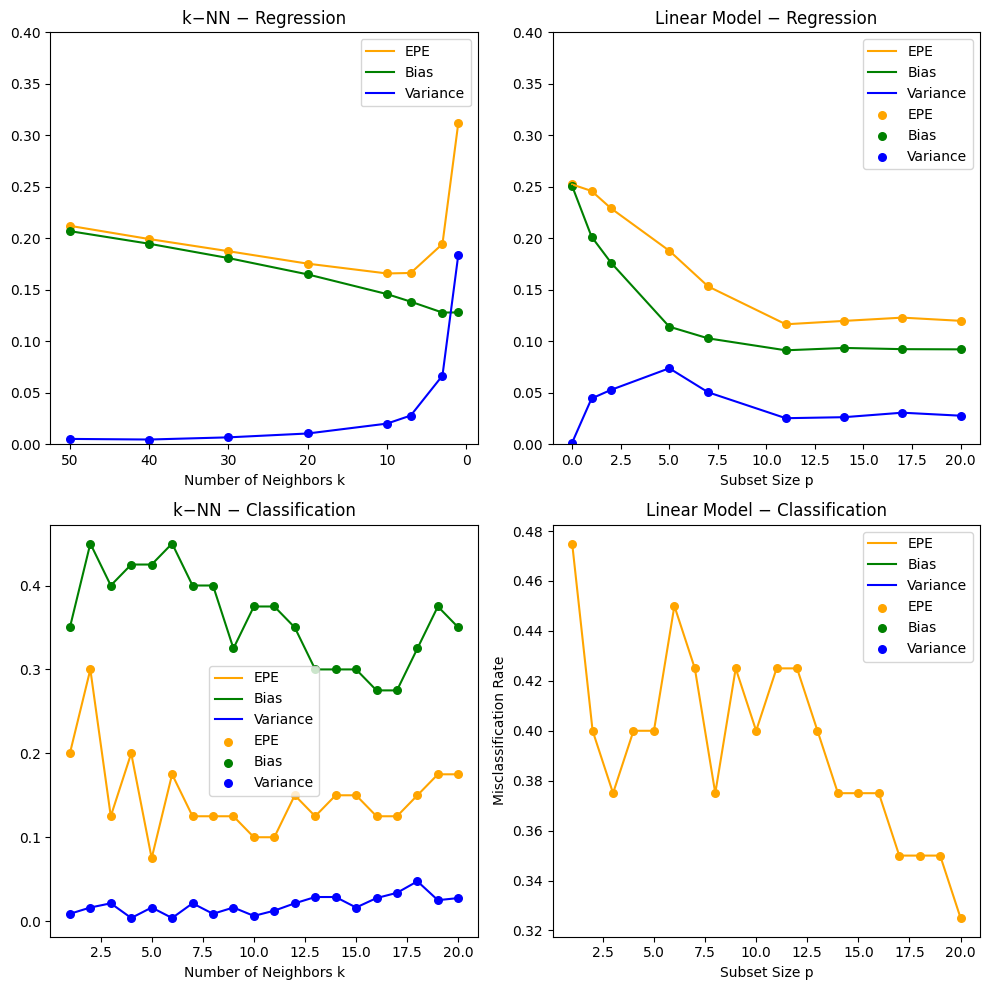

In [110]:
import numpy as np
from numpy.random import uniform
from matplotlib import pyplot as plt
from sklearn import neighbors
from itertools import combinations
%matplotlib inline

test_size = 10000
trials = 10
X_test = uniform(0, 1, size=(test_size, 20))
Y1_test= (X_test[:,0]>0.5) + np.zeros(test_size)
Y2_test = (np.sum(X_test[:,:10], axis=1)>5) + np.zeros(test_size)

# K NEAREST NEIGHBORS MODEL - FOR REGRESSION

k_means_gen_erros = {k: [] for k in [50, 40, 30, 20, 10, 7, 3, 1]}

for k in k_means_gen_erros:
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y1= (X[:,0]>0.5) + np.zeros(80)
        knn = neighbors.KNeighborsRegressor(k)
        predict = knn.fit(X, Y1).predict(X_test)
        k_means_gen_erros[k].append(np.mean((Y1_test - predict) ** 2))
    break


k_means_pred_errors = []
k_means_bias = []
k_means_variance = []

for k in sorted(k_means_gen_erros):
    tmp = np.zeros((test_size, trials))
    err = []
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y1= (X[:,0]>0.5) + np.zeros(80)
        knn = neighbors.KNeighborsRegressor(k)
        predict = knn.fit(X, Y1).predict(X_test)
        tmp[:,t] = predict
        err.append(np.mean((Y1_test - predict)**2))
    bias, variance = np.mean((np.mean(tmp, axis=1) - Y1_test)**2), np.mean(np.var(tmp, axis=1))
    k_means_pred_errors.append(np.mean(err))
    k_means_bias.append(bias)
    k_means_variance.append(variance)

# BEST SUBSET SELECTION MODEL - FOR REGRESSION

p = 18
X_test_ = np.hstack((np.ones(shape=(X_test.shape[0], 1)), X_test))

p_vars = [0, 1, 2, 5, 7, 11, 14, 17, 20]
lr_pred_errors = []
lr_bias = []
lr_variance = []
trials = 10

for p in p_vars:
    tmp = np.zeros((test_size, trials))
    err = []
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y2 = (np.sum(X[:,:10], axis=1)>5) + np.zeros(80)
        X = np.hstack((np.ones(shape=(80, 1)), X))

        best_combination, best_beta, min_error = None, None, np.inf
        for predictors in combinations(list(range(1, 21)), p):
            predictors = [0] + list(predictors)
            X_ = X[:,predictors]
            beta = np.linalg.inv(X_.T @ X_) @ X_.T @ Y2
            y_hat = X_ @ beta
            error = np.mean((Y2 - y_hat) ** 2)
            if error < min_error:
                best_combination = predictors
                min_error = error
                best_beta = beta
        predict = X_test_[:,best_combination] @ best_beta
        tmp[:,t] = predict
        err.append(np.mean((Y2_test - predict)**2))
    bias, variance = np.mean((np.mean(tmp, axis=1) - Y2_test)**2), np.mean(np.var(tmp, axis=1))
    lr_pred_errors.append(np.mean(err))
    lr_bias.append(bias)
    lr_variance.append(variance)
    print(p, np.mean(err), bias, variance, np.mean(err)-bias-variance)


# PLOTTING

size = 30


# Plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Regression - k-nearest neighbors
axes[0, 0].plot(sorted(k_means_gen_erros), k_means_pred_errors, color = 'orange', label='EPE')
axes[0, 0].plot(sorted(k_means_gen_erros), k_means_bias, color = 'green', label='Bias')
axes[0, 0].plot(sorted(k_means_gen_erros), k_means_variance, color = 'blue', label='Variance')
axes[0, 0].scatter(sorted(k_means_gen_erros), k_means_pred_errors, color = 'orange', s = size)
axes[0, 0].scatter(sorted(k_means_gen_erros), k_means_bias, color = 'green', s = size)
axes[0, 0].scatter(sorted(k_means_gen_erros), k_means_variance, color = 'blue', s = size)
axes[0, 0].invert_xaxis()
axes[0, 0].set_title('k−NN − Regression')
axes[0, 0].set_xlabel('Number of Neighbors k')
axes[0, 0].legend()
axes[0, 0].set_ylim(0, 0.4)


# Regression - best subset regression
axes[0, 1].plot(p_vars, lr_pred_errors, color='orange', label='EPE')
axes[0, 1].plot(p_vars, lr_bias, color='green', label='Bias')
axes[0, 1].plot(p_vars, lr_variance, color='blue', label='Variance')
axes[0, 1].scatter(p_vars, lr_pred_errors, color='orange', label='EPE', s = size)
axes[0, 1].scatter(p_vars, lr_bias, color='green', label='Bias', s = size)
axes[0, 1].scatter(p_vars, lr_variance, color='blue', label='Variance', s = size)
axes[0, 1].set_title('Linear Model − Regression')
axes[0, 1].set_xlabel('Subset Size p')
axes[0, 1].legend()
axes[0, 1].set_ylim(0, 0.4)



# Classification - k-nearest neighbors
axes[1, 0].plot(k_values, epe_knn_clf, color='orange', label='EPE')
axes[1, 0].plot(k_values, bias_knn_clf, color='green', label='Bias')
axes[1, 0].plot(k_values, var_knn_clf, color='blue', label='Variance')
axes[1, 0].scatter(k_values, epe_knn_clf, color='orange', label='EPE', s = size)
axes[1, 0].scatter(k_values, bias_knn_clf, color='green', label='Bias', s = size)
axes[1, 0].scatter(k_values, var_knn_clf, color='blue', label='Variance', s = size)
axes[1, 0].set_title('k−NN − Classification')
axes[1, 0].set_xlabel('Number of Neighbors k')
axes[1, 0].legend()


# Classification - best subset regression
axes[1, 1].plot(p_values, epe_best_subset_clf, color='orange', label='EPE')
axes[1, 1].plot(p_values, bias_best_subset_clf, color='green', label='Bias')
axes[1, 1].plot(p_values, var_best_subset_clf, color='blue', label='Variance')
axes[1, 1].scatter(p_values, epe_best_subset_clf, color='orange', label='EPE', s = size)
axes[1, 1].scatter(p_values, bias_best_subset_clf, color='green', label='Bias', s = size)
axes[1, 1].scatter(p_values, var_best_subset_clf, color='blue', label='Variance', s = size)
axes[1, 1].set_title('Linear Model − Classification')
axes[1, 1].set_xlabel('Subset Size p')
axes[1, 1].set_ylabel('Misclassification Rate')
axes[1, 1].legend()


plt.tight_layout()
plt.show()


### THE PLOTS HAVE BEEN PERFECTLY OBTAINED FOR BOTH REGRESSION MODELS. 

### IN THE CASE OF THE CLASSIFICATION MODELS, THE MODELS ALSO WORK BUT THEY NEED TOO MUCH TIME FOR COMPUTATION... THAT IS WHY THE PLOTS DO NOT APPEAR

### NEEVRTHELESS, HERE I LEABE YOU THE SCRIPTS FOR BOTH CLASSIFICATION MODELS. AS YOU CAN CHECK IN THE PRINTING STATEMENTS OF THE PROGRAM, THE MODEL WORKS BUT GETS STUCKED IN THE  2 OR 5 SIZE SUBSET SELECTION OF THE THIRD AND FORTH POSITIONS OF THIS TESTING LIST [0, 1, 2, 5, 7, 11, 14, 17, 20]. bUT WITH MUCH MORE TIME, IT WOULD COMPUTE THE WHOLE TASK AND BE ABLE TO GIVE THE PLOTS.

### I HAVE TRIED TO DIMISH THE NUMBER OF TRIALS FROM 10 TO 1... BUT OON THHEONE HAND, THE RESULTS OBTAINED IN A REASONABLE TIME GET LESS ACCURATE, AND ON THE OTHER HAND, I STILL DO NOT GET TO ALGORITHM TO RUN ENTIRELY, IT GETS STUCK WHILE GOING THROUGH THE TESTING LIST

SCRIPT FOR BEST SUBSET SELECTION IN THE CLASSIFICATION MODEL

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

p = 18
X_test_ = np.hstack((np.ones(shape=(X_test.shape[0], 1)), X_test))

p_vars = [0, 1, 2, 5, 7, 11, 14, 17, 20]
logreg_pred_errors = []
logreg_bias = []
logreg_variance = []
trials = 1

for p in p_vars:
    tmp = np.zeros((test_size, trials))
    err = []
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y2 = (np.sum(X[:,:10], axis=1)>5) + np.zeros(80)
        X = np.hstack((np.ones(shape=(80, 1)), X))

        best_combination, best_clf, min_error = None, None, np.inf
        for predictors in combinations(list(range(1, 21)), p):
            predictors = [0] + list(predictors)
            X_ = X[:,predictors]
            clf = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_, Y2)
            y_hat = clf.predict(X_)
            error = 1 - accuracy_score(Y2, y_hat)
            if error < min_error:
                best_combination = predictors
                min_error = error
                best_clf = clf
        predict = best_clf.predict(X_test_[:,best_combination])
        tmp[:,t] = predict
        err.append(1 - accuracy_score(Y2_test, predict))
    bias, variance = np.mean((np.mean(tmp, axis=1) - Y2_test)**2), np.mean(np.var(tmp, axis=1))
    logreg_pred_errors.append(np.mean(err))
    logreg_bias.append(bias)
    logreg_variance.append(variance)
    print(p, np.mean(err), bias, variance, np.mean(err)-bias-variance)

plt.plot(p_vars, logreg_pred_errors)
plt.plot(p_vars, logreg_bias)
plt.plot(p_vars, logreg_variance)
plt.ylim(0, 0.4)
plt.gca().invert_xaxis()
plt.ylim(0, 0.4)
plt.xlabel("Subset Size p")
plt.ylabel("Error")
plt.title("Linear Model - Classifier")
plt.legend()

0 0.5064 0.5064 0.0 0.0
1 0.3903 0.3903 0.0 0.0
2 0.3608 0.3608 0.0 0.0
5 0.3023 0.3023 0.0 0.0


SCRIPT FOR K-NEAREST NEIGHBORS IN THE CLASSIFICATION MODEL

In [ ]:
import numpy as np
from numpy.random import uniform
from matplotlib import pyplot as plt
from sklearn import neighbors
from itertools import combinations
%matplotlib inline

test_size = 10000
trials = 100
X_test = uniform(0, 1, size=(test_size, 20))
Y1_test = (X_test[:,0]>0.5).astype(int)
Y2_test = (np.sum(X_test[:,:10], axis=1)>5).astype(int)

k_means_gen_erros = {k: [] for k in [50, 40, 30, 20, 10, 7, 3, 1]}

for k in k_means_gen_erros:
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y1 = (X[:,0]>0.5).astype(int)
        knn = neighbors.KNeighborsClassifier(k)
        predict = knn.fit(X, Y1).predict(X_test)
        k_means_gen_erros[k].append(np.mean((Y1_test - predict) ** 2))
    break

k_means_pred_errors = []
k_means_bias = []
k_means_variance = []

for k in sorted(k_means_gen_erros):
    tmp = np.zeros((test_size, trials))
    err = []
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y1 = (X[:,0]>0.5).astype(int)
        knn = neighbors.KNeighborsClassifier(k)
        predict = knn.fit(X, Y1).predict(X_test)
        tmp[:,t] = predict
        err.append(np.mean((Y1_test - predict)**2))
    bias, variance = np.mean((np.mean(tmp, axis=1) - Y1_test)**2), np.mean(np.var(tmp, axis=1))
    k_means_pred_errors.append(np.mean(err))
    k_means_bias.append(bias)
    k_means_variance.append(variance)

plt.plot(sorted(k_means_gen_erros), k_means_pred_errors, color = 'orange', label="Prediction Error")
plt.plot(sorted(k_means_gen_erros), k_means_bias, color = 'green', label="Bias")
plt.plot(sorted(k_means_gen_erros), k_means_variance, color = 'blue', label="Variance")
plt.gca().invert_xaxis()
plt.ylim(0, 0.4)
plt.xlabel("K")
plt.ylabel("Error")
plt.title("K Nearest Neighbors Classifier")
plt.legend()

plt.show()


KeyboardInterrupt: 